In [1]:
import surprise
import pandas as pd
import numpy as np

In [4]:
data = surprise.Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\ezen/.surprise_data/ml-100k


In [5]:
## load_builtin으로 불러왔기 때문에 바로 data로 불러오면 된다.
df = pd.DataFrame(data.raw_ratings, columns=['user','item','rate','id'])

In [6]:
del df['id']

In [7]:
df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [8]:
dt = df.set_index(['user','item']).unstack()
dt.iloc[0:10, 0:10].fillna('')

rate                                          
item    1 10 100 1000 1001 1002 1003 1004 1005 1006
user                                               
1       5  3   5                                   
10      4      5                                   
100                                                
101     3                                          
102     3                                          
103                                                
104        2   4                                   
105                                                
106     4      3                                   
107

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Rate Matrix')

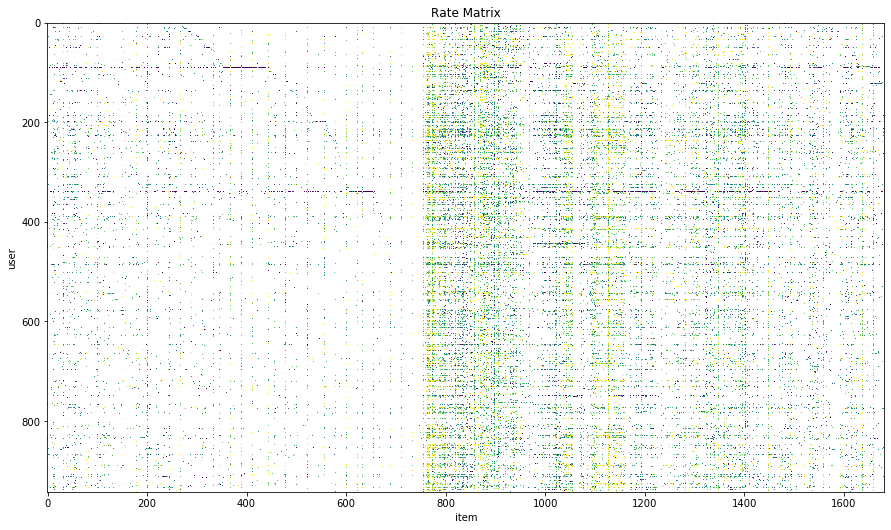

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(dt)
plt.grid(False)
plt.xlabel('item')
plt.ylabel('user')
plt.title('Rate Matrix')

#### SGD (Stochastic Gradient Descent)
#### ALS (Alternating Least Squares)

## 모형 학습 및 평가

In [12]:
from surprise.model_selection import KFold

In [13]:
bsl_param = {'method':'als', 'n_epochs':5, 'reg_u':12, 'reg_i':5}
model = surprise.BaselineOnly(bsl_options=bsl_param)

In [18]:
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset ) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9410
Estimating biases using als...
RMSE: 0.9483
Estimating biases using als...
RMSE: 0.9416


0.9436286472918344

In [19]:
from surprise.model_selection import cross_validate
cross_validate(model, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94616747, 0.93695064, 0.93928629, 0.94733395, 0.93726798]),
 'test_mae': array([0.74914941, 0.74111369, 0.74426592, 0.74988466, 0.74255501]),
 'fit_time': (0.09373855590820312,
  0.10909056663513184,
  0.10413479804992676,
  0.10899877548217773,
  0.10938000679016113),
 'test_time': (0.06247591972351074,
  0.12499594688415527,
  0.06247973442077637,
  0.06248164176940918,
  0.062479257583618164)}